<a href="https://colab.research.google.com/github/Tclack88/Lambda/blob/master/DS-1-4-Linear-Algebra/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

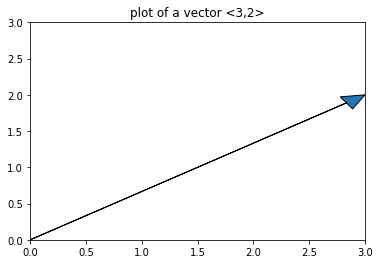

In [0]:
a = np.array([3,2])
plt.arrow(0,0,3,2,length_includes_head=True,head_width=.2,head_length=.2)
plt.ylim(0,3)
plt.xlim(0,3)
plt.title('plot of a vector <3,2>');

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


The norm of a vector represents its magnitude or length (euclidean in whatever space it inhabits)

In [0]:
b = np.array([17,-4,-2,1])
print('Norm of b:',np.linalg.norm(b))

Norm of b: 17.60681686165901


## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
c = np.array([3,7,-2,12])
d = np.array([9,-7,4,6])
print('dot product of c and d:\t',np.dot(c,d))

dot product of c and d:	 42


They are NOT orthogonal, because their dot product is non-zero. (Dot products can be thought of geometrically as giving the [non-normalized] magnitude of projection of one vector onto another)

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
E =  np.array([[7,4,2],[1,3,-1],[2,6,-4]])
print('E inverse:\n',np.linalg.inv(E))
print('\nE transpose:\n',E.T)

E inverse:
 [[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]

E transpose:
 [[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [0]:
F = np.array([[2,-2,5],[4,1,10],[12,6,30]])


By inspection, columd 1 and 3 are linearly dependent (The ratio is 1:2:6) and so by the invertible matrix theorem, the columns fails as a whole to span R3 so determinant is 0)

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, sample variance, and sample standard deviation for both the number of customers and inches of new snow for the week. Remember that on SCs you can use library functions, dataframes, .describe(), etc. 



In [0]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]
df = pd.DataFrame({'customers':customers,'snow':snow})
df

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0
5,1450,6
6,1600,4


In [0]:
print('Customers:\n')
print('mean:\t\t\t\t',df.customers.mean(),'\nsample variance:\t\t',df.customers.var(),'\nsample standard deviation:\t',df.customers.std())
print('\n\nSnow:\n')
print('mean:\t\t\t\t',df.snow.mean(),'\nsample variance:\t\t',df.snow.var(),'\nsample standard deviation:\t',df.snow.std())

Customers:

mean:				 1135.7142857142858 
sample variance:		 98761.90476190478 
sample standard deviation:	 314.26406851866597


Snow:

mean:				 2.7142857142857144 
sample variance:		 8.571428571428571 
sample standard deviation:	 2.9277002188455996


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [0]:
df.corr()

,customers,snow
customers,1.000000,0.728463
snow,0.728463,1.000000


They are likely correlated, but not comparable directly

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
cov_matrix = df.cov()
cov_matrix

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
df = df.set_index('Country')   # Country is non_numeric, but relevent information, so setting it as the index seems appropriate

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

#df_standardized = (df - df.mean())/df.std() # Alternative way to standardize the data
#df_standardized.head() # viewing to verify the

df_standardized

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. 

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
from sklearn.decomposition import PCA
pca = PCA(2)
data = pca.fit_transform(df_standardized)

In [0]:
vectors = pca.components_
P = np.dot(vectors,df_standardized.T)  # principal components obtained from doting the eigenvectors agains the standardized dataframe

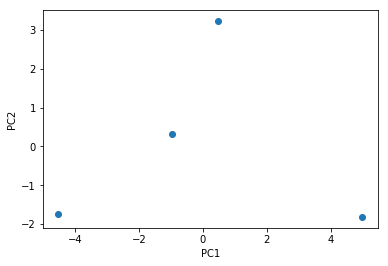

In [0]:
plt.scatter(P[0],P[1])
plt.xlabel('PC1')
plt.ylabel('PC2');

## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.

If we consider a matrix as a transformation, then the eigenvectors are the vectors which do not rotate during the transformation, they merely scale. Eigenvalues represent how much they scale by during this transformation

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


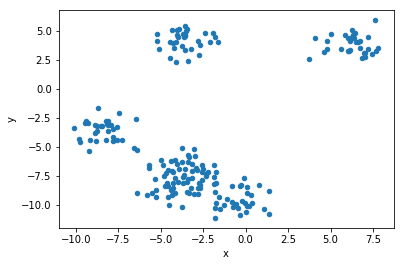

In [0]:
points.plot.scatter('x','y');

It appears there are about 4 or 5 distinct blobs, so I will try to cluster them by these groupings

In [0]:
from matplotlib import cm
cmap = cm.get_cmap('cividis')  # clusters were grayscale before and I couldn't see one of the clusters (the white cluster) during each iteration

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:202: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


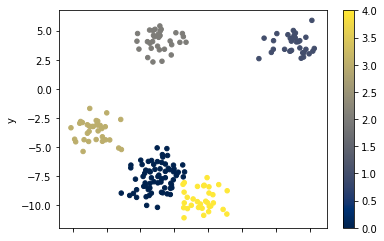

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(points)
labels = kmeans.labels_

points.plot.scatter(*points,cmap=cmap,color=labels);

### Stretch : Why k = 5 is ideal -- elbow plot

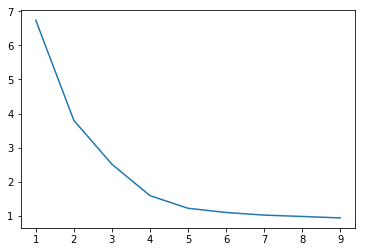

In [0]:
from scipy.spatial.distance import cdist

K = range(1,10)

elbows = []
for k in K:
  kmean_model = KMeans(n_clusters = k).fit(points)
  elbows.append(sum(np.min(cdist(points,kmean_model.cluster_centers_,'euclidean'),axis=1))/points.shape[0])
  
plt.plot(K,elbows);

### judgment call
4 seems to be more accute than 5, but either is fine, certainly there is no further imporovments after that

# Stretch Goals (AKA how to get a 3):

Complete the stretch goals for each section in order to get a 3 on that section.

## Parts 1 & 2 (do all of the following): 
  - Comment your code well with both markdown and inline comments where appropriate
  - Show your work with code and possibly LaTeX 
  - Justify your answers particularly well to show advanced mastery of this section

## Part 3 (do all of the following): 
 - Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)
    - If you want to include a the cumulative proportion of explained variance, you might be interested in this NumPy Function: [numpy.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
 - Give a top-notch explanation of eigenvalues and eigenvectors. Feel free to any materials, images, code, graphs, LaTeX, etc. to spruce up your answer.

## Part 4 (do all of the following):
- Justify your choice of k, both visually (scatterplot) and mathematically (elbow plot).